In [1]:
from Bio import SeqIO

human_sequences = [record for record in SeqIO.parse("./4.fas", "fasta") if record.id.startswith("human")]
mapping_dict = {}
for record in human_sequences:
    original_seq = str(record.seq).replace("-", "")  
    alignment_seq = str(record.seq)
    original_pos = 1 
    alignment_mapping = {}  
    for i, char in enumerate(alignment_seq):
        if char != "-":  
            alignment_mapping[i+1] = original_pos
            original_pos += 1
    mapping_dict[record.id] = alignment_mapping

In [2]:
RL = {
  "human_EGFR":[(57,167),(361,480)],
  "human_ERBB2":[(52,172),(366,484)],
  "human_ERBB3":[(56,166),(353,472)],
  "human_ERBB4":[(55,166),(358,477)]
}

FL = {
  "human_EGFR": [(185,338)],
  "human_ERBB2": [(190,343)],
  "human_ERBB3": [(183,332)],
  "human_ERBB4": [(186,335)]
}

GF = {
  "human_EGFR": [(505, 636)],
  "human_ERBB2": [(511, 642)],
  "human_ERBB3": [(499, 629)],
  "human_ERBB4": [(502, 633)]
}

PT = {
  "human_EGFR": [(714, 966)],
  "human_ERBB2": [(722, 975)],
  "human_ERBB3": [(711, 964)],
  "human_ERBB4": [(719, 973)]
}

EG = {
  "human_EGFR": [(646, 681)],
  "human_ERBB2": [(654, 688)],
  "human_ERBB4": [(653, 688)]
}

In [3]:
mp_EGFR = {v:k for k,v in mapping_dict['human_EGFR'].items()}
mp_ERBB2 = {v:k for k,v in mapping_dict['human_ERBB2'].items()}
mp_ERBB3 = {v:k for k,v in mapping_dict['human_ERBB3'].items()}
mp_ERBB4 = {v:k for k,v in mapping_dict['human_ERBB4'].items()}

In [4]:
from copy import deepcopy
RL_map=deepcopy(RL)
FL_map=deepcopy(FL)
GF_map=deepcopy(GF)
PT_map=deepcopy(PT)
EG_map=deepcopy(EG)
mapping_list = [(EG,EG_map),(RL,RL_map),(FL,FL_map),(GF,GF_map),(PT,PT_map)]
genes = list(GF.keys())
for domain_name,domain_map in mapping_list:
  for gene in genes:
    mp_gene = {v:k for k,v in mapping_dict[gene].items()}
    domain_map[gene]=None
    try:
      domain = domain_name[gene]
    except KeyError:
      print(gene,"is none")
    else:
      if domain is not None:
        for p in domain:
          
          try:
            start = p[0]
          except TypeError:
            print(p,domain)
            break
          end = p[1]
          start_mp = mp_EGFR[start]
          end_mp = mp_EGFR[end]
          if domain_map[gene] is None:
            domain_map[gene] = [(start_mp,end_mp)]
          else:
            domain_map[gene].extend([(start_mp,end_mp)])

human_ERBB3 is none


In [5]:
import pandas as pd
diverge_sites_df = pd.read_excel("./result_p67.xlsx",index_col=0)
diverge_sites = list(diverge_sites_df.index.values)
diverge_sites


[327,
 337,
 363,
 371,
 386,
 398,
 399,
 400,
 406,
 409,
 434,
 435,
 452,
 453,
 468,
 469,
 471,
 473,
 483,
 499,
 502,
 503,
 509,
 518,
 528,
 530,
 542,
 545,
 546,
 552,
 568,
 569,
 573,
 574,
 575,
 577,
 578,
 579,
 610,
 611,
 612,
 614,
 615,
 619,
 620,
 625,
 642,
 644,
 667,
 678,
 679,
 700,
 701,
 704,
 707,
 712,
 725,
 726,
 730,
 738,
 739,
 793,
 808,
 845,
 848,
 905,
 906,
 910,
 943,
 1068,
 1072,
 1074,
 1077,
 1089,
 1090,
 1093,
 1094,
 1095,
 1100,
 1128,
 1131,
 1132,
 1133,
 1141,
 1143,
 1144,
 1146,
 1149,
 1151,
 1152,
 1153,
 1155,
 1165,
 1174,
 1181,
 1182,
 1186,
 1195,
 1197,
 1199,
 1201,
 1212,
 1217,
 1224,
 1232,
 1233,
 1235,
 1241,
 1252,
 1255,
 1273,
 1280,
 1281,
 1291,
 1296,
 1298,
 1299,
 1302,
 1312,
 1313,
 1317,
 1318,
 1319,
 1320,
 1321,
 1322,
 1330,
 1337,
 1338,
 1359,
 1365,
 1376,
 1378,
 1401,
 1404,
 1405,
 1428,
 1449,
 1454,
 1458,
 1459,
 1460,
 1476]

In [7]:
from pymsaviz import MsaViz
mv = MsaViz("./4_human.fas",format='fasta',show_consensus= False,wrap_length=60,show_grid=True,color_scheme='None')

In [8]:
# #FL:skyblue RL:salmon GF:lime PT:green EG:gray

gene_dict = {"human_EGFR":2,"human_ERBB4":0,"human_ERBB3":1,"human_ERBB2":3}

def custom_color_func(row_pos,col_pos,seq_char,msa):
  for gene,row_num in gene_dict.items():
    if col_pos+1 in diverge_sites:
      return('salmon')
    if row_pos==row_num and seq_char!='-':
      #FL
      FL_col_list = FL_map[gene]
      for p in FL_col_list:
        if p[0]<=col_pos+1<=p[1]:
          return "skyblue"
      #EG
      if gene!='human_ERBB3':
        EG_col_list = EG_map[gene]
        for p in EG_col_list:
          if p[0]<=col_pos+1<=p[1]:
            return "lightgray"
      #RL
      RL_col_list = RL_map[gene]
      for p in RL_col_list:
        if p[0]<=col_pos+1<=p[1]:
          return "bisque"
      #GF
      GF_col_list = GF_map[gene]
      for p in GF_col_list:
        if p[0]<=col_pos+1<=p[1]:
          return "lightyellow"
      #PT
      PT_col_list = PT_map[gene]
      for p in PT_col_list:
        if p[0]<=col_pos+1<=p[1]:
          return "honeydew"
  return None

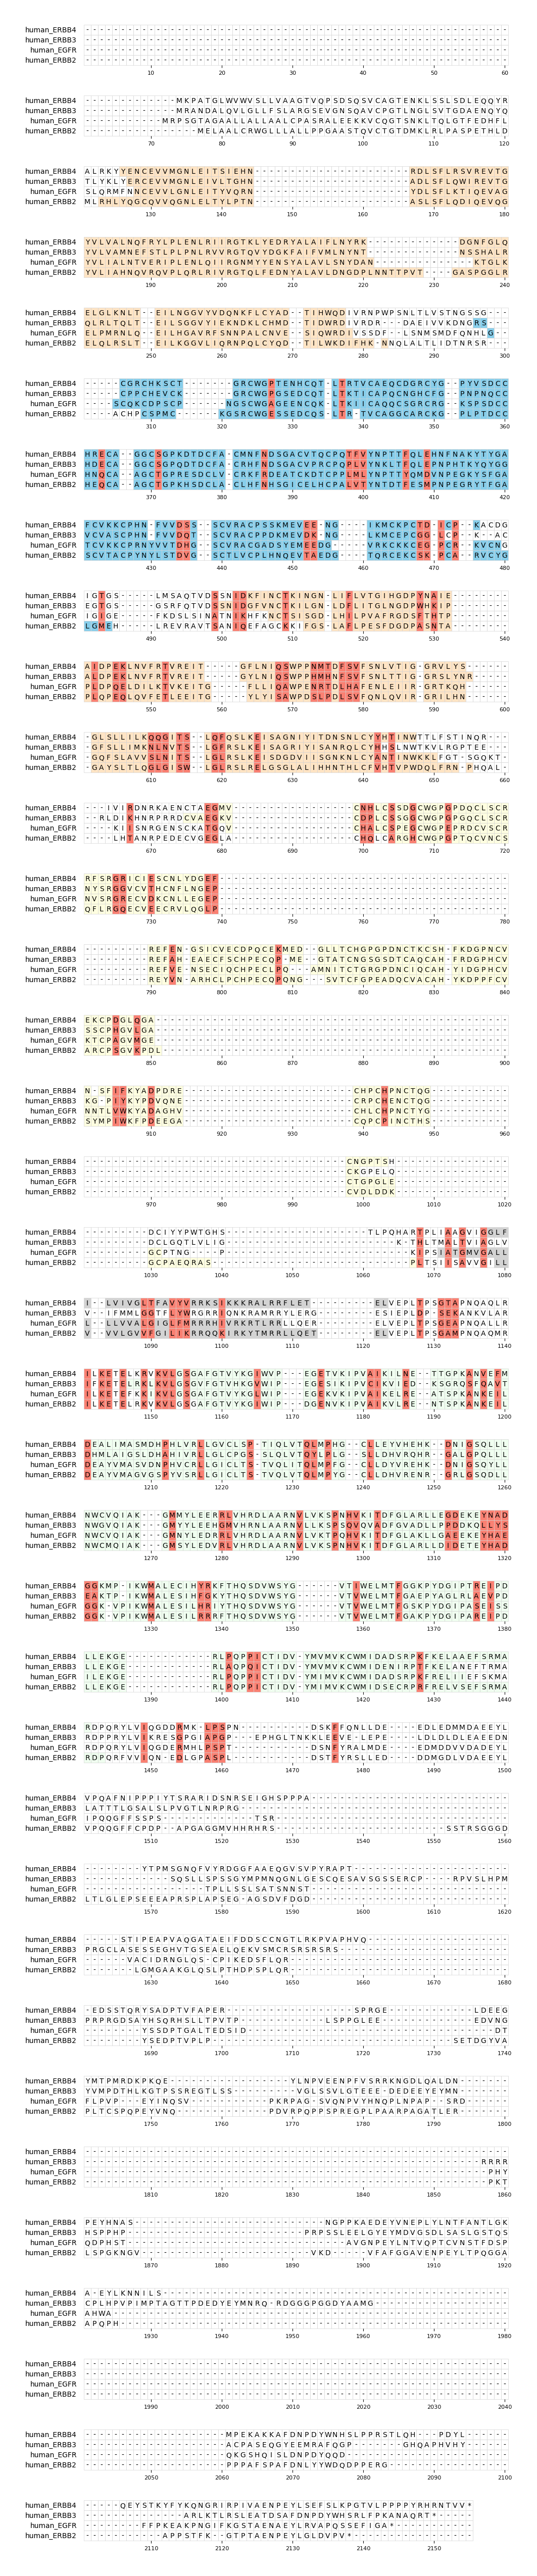

In [9]:
mv.set_custom_color_func(custom_color_func)
fig=mv.plotfig()